In [257]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [258]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,silhouette_score,confusion_matrix 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans 
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [259]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [260]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [261]:
data.duplicated().sum()
data.drop_duplicates(inplace=True,subset=None,keep='first', ignore_index=False)
data.duplicated().sum()

0

In [262]:
orig_sex = data.sex 

le = LabelEncoder()

data.sex = le.fit_transform(data.sex)
data.region = le.fit_transform(data.region)
data.smoker = le.fit_transform(data.region)

le_sex = data.sex 

orig_sex_dic = np.unique(orig_sex)
le_sex_dic = np.unique(le_sex)

sex_dic = dict(zip(orig_sex_dic,le_sex_dic))
sex_dic

{'female': 0, 'male': 1}

<AxesSubplot:title={'center':'Correlation Matrix'}>

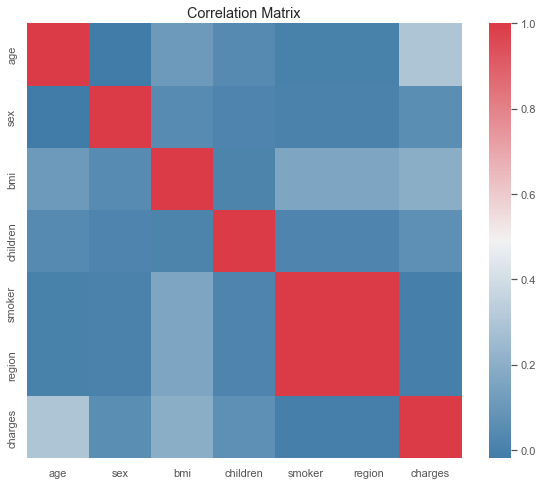

In [263]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240, 10, as_cmap=True), ax=ax, square=True)

In [264]:
x = data.drop(columns=['charges'])
y = data.charges 
x


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,3,3
1,18,1,33.770,1,2,2
2,28,1,33.000,3,2,2
3,33,1,22.705,0,1,1
4,32,1,28.880,0,1,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,2,2
1336,21,0,25.800,0,3,3


In [265]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [266]:
y = scaler.fit_transform(np.array(y).reshape(-1,1))
y

array([[ 0.2978567 ],
       [-0.9543806 ],
       [-0.72937251],
       ...,
       [-0.96228744],
       [-0.9310536 ],
       [ 1.31029752]])

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0, test_size=0.3)

In [268]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_true = y_test
y_pred = linreg.predict(x_test)

scr_r2 = r2_score(y_true,y_pred).round(3)
scr_mse = mean_squared_error(y_true,y_pred).round(3)

mod_perf = pd.DataFrame( 
    [ 
        'LinearRegression', scr_r2,scr_mse
    ]
).transpose()
mod_perf.columns = ['Method', 'Tets R2', 'Test Mse']

mod_perf

,Method,Tets R2,Test Mse
0,LinearRegression,0.157,0.942
